## Clustering NBA Players

* player -- name of the player
* pos -- the position of the player
* g -- number of games the player was in
* pts -- total points the player scored
* fg. -- field goal percentage
* ft. -- free throw percentage

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nba = pd.read_csv("nba_2013.csv")
nba.head(3)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013


In [3]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

## Point Guards

In [5]:
point_guards = nba[nba['pos'] == 'PG']
point_guards

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
24,D.J. Augustin,PG,26,TOT,71,9,1939,298,718,0.415,...,115,130,313,53,3,125,147,930,2013-2014,2013
29,Leandro Barbosa,PG,31,PHO,20,0,368,56,131,0.427,...,32,37,32,7,4,19,30,150,2013-2014,2013
30,Jose Barea,PG,29,MIN,79,1,1471,254,656,0.387,...,138,154,303,26,0,125,129,660,2013-2014,2013
38,Jerryd Bayless,PG,25,TOT,72,19,1686,248,617,0.402,...,123,145,194,60,9,82,161,666,2013-2014,2013
50,Steve Blake,PG,33,TOT,55,28,1498,133,353,0.377,...,146,159,307,54,8,102,85,378,2013-2014,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Russell Westbrook,PG,25,OKC,46,46,1412,346,791,0.437,...,208,263,319,88,7,177,104,1002,2013-2014,2013
462,Deron Williams,PG,29,BRK,64,58,2059,322,716,0.450,...,153,168,392,93,13,143,148,915,2013-2014,2013
465,Louis Williams,PG,27,ATL,60,7,1445,197,493,0.400,...,114,124,210,45,4,92,65,625,2013-2014,2013
467,Mo Williams,PG,31,POR,74,0,1834,280,672,0.417,...,111,153,321,55,10,149,197,721,2013-2014,2013


## Points Per Game

In [6]:
point_guards['ppg'] = point_guards['pts'] / point_guards['g']

# Sanity check, make sure ppg = pts/g
point_guards[['pts', 'g', 'ppg']].head(5)

c:\users\test\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,pts,g,ppg
24,930,71,13.098592
29,150,20,7.500000
30,660,79,8.354430
38,666,72,9.250000
50,378,55,6.872727


## Assist Turnover Ratio

$ATR =  \frac{ Assists} {Turnovers}$

In [7]:
point_guards = point_guards[point_guards['tov'] != 0]

point_guards['atr'] = point_guards['ast']/point_guards['tov']
point_guards

c:\users\test\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,ast,stl,blk,tov,pf,pts,season,season_end,ppg,atr
24,D.J. Augustin,PG,26,TOT,71,9,1939,298,718,0.415,...,313,53,3,125,147,930,2013-2014,2013,13.098592,2.504000
29,Leandro Barbosa,PG,31,PHO,20,0,368,56,131,0.427,...,32,7,4,19,30,150,2013-2014,2013,7.500000,1.684211
30,Jose Barea,PG,29,MIN,79,1,1471,254,656,0.387,...,303,26,0,125,129,660,2013-2014,2013,8.354430,2.424000
38,Jerryd Bayless,PG,25,TOT,72,19,1686,248,617,0.402,...,194,60,9,82,161,666,2013-2014,2013,9.250000,2.365854
50,Steve Blake,PG,33,TOT,55,28,1498,133,353,0.377,...,307,54,8,102,85,378,2013-2014,2013,6.872727,3.009804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Russell Westbrook,PG,25,OKC,46,46,1412,346,791,0.437,...,319,88,7,177,104,1002,2013-2014,2013,21.782609,1.802260
462,Deron Williams,PG,29,BRK,64,58,2059,322,716,0.450,...,392,93,13,143,148,915,2013-2014,2013,14.296875,2.741259
465,Louis Williams,PG,27,ATL,60,7,1445,197,493,0.400,...,210,45,4,92,65,625,2013-2014,2013,10.416667,2.282609
467,Mo Williams,PG,31,POR,74,0,1834,280,672,0.417,...,321,55,10,149,197,721,2013-2014,2013,9.743243,2.154362


## Visualizing the Point Guards

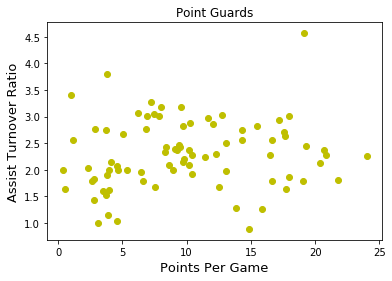

In [10]:
plt.scatter(point_guards['ppg'], point_guards['atr'], c='y')
plt.title("Point Guards")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()

## Clustering players

There seem to be 5 general regions, or clusters, that the point guards fall into (with a few outliers of course!). We can use a technique called clustering to segment all of the point guards into groups of alike players. While regression and other supervised machine learning techniques work well when we have a clear metric we want to optimize for and lots of pre-labelled data, we need to instead use unsupervised machine learning techniques to explore the structure within a data set that doesn't have a clear value to optimize.

There are multiple ways of clustering data but here we will focus on centroid based clustering for this lesson. Centroid based clustering works well when the clusters resemble circles with centers (or centroids). The centroid represent the arithmetic mean of all of the data points in that cluster.

K-Means Clustering is a popular centroid-based clustering algorithm that we will use. The K in K-Means refers to the number of clusters we want to segment our data into. The key part with K-Means (and most unsupervised machine learning techniques) is that we have to specify what k is. There are advantages and disadvantages to this, but one advantage is that we can pick the k that makes the most sense for our use case. We'll set k to 5 since we want K-Means to segment our data into 5 clusters.

## The Algorithm

Step 1 (Assign Points to Clusters) For each player, calculate the Euclidean distance between that player's coordinates, or values for atr & ppg, and each of the centroids' coordinates. Assign the player to the cluster whose centroid is the closest to, or has the lowest Euclidean distance to, the player's values.

Step 2 (Update New Centroids of the Clusters) For each cluster, compute the new centroid by calculating the arithmetic mean of all of the points (players) in that cluster. We calculate the arithmetic mean by taking the average of all of the X values (atr) and the average of all of the Y values (ppg) of the points in that cluster.

In [11]:
num_clusters = 5
# Use numpy's random function to generate a list, length: num_clusters, of indices
random_initial_points = np.random.choice(point_guards.index, size=num_clusters)
# Use the random indices to create the centroids
centroids = point_guards.loc[random_initial_points]

In [12]:
centroids

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,ast,stl,blk,tov,pf,pts,season,season_end,ppg,atr
279,John Lucas,PG,31,UTA,42,6,591,62,190,0.326,...,42,14,0,22,41,159,2013-2014,2013,3.785714,1.909091
431,Jamaal Tinsley,PG,35,UTA,8,5,110,4,20,0.200,...,23,2,0,9,10,9,2013-2014,2013,1.125000,2.555556
312,Darius Morris,PG,23,TOT,27,0,313,39,96,0.406,...,44,13,0,27,33,107,2013-2014,2013,3.962963,1.629630
208,Jrue Holiday,PG,23,NOP,34,34,1143,203,454,0.447,...,268,56,12,105,92,487,2013-2014,2013,14.323529,2.552381
471,Nate Wolters,PG,22,MIL,58,31,1309,170,389,0.437,...,187,35,15,57,67,417,2013-2014,2013,7.189655,3.280702


## Visualize Centroids

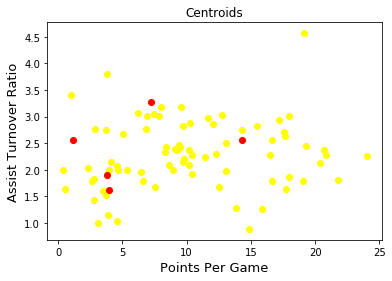

In [13]:
plt.scatter(point_guards['ppg'], point_guards['atr'], c='yellow')
plt.scatter(centroids['ppg'], centroids['atr'], c='red')
plt.title("Centroids")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()

## Setup (continued)

In [14]:
def centroids_to_dict(centroids):
    dictionary = dict()
    # iterating counter we use to generate a cluster_id
    counter = 0

    # iterate a pandas data frame row-wise using .iterrows()
    for index, row in centroids.iterrows():
        coordinates = [row['ppg'], row['atr']]
        dictionary[counter] = coordinates
        counter += 1

    return dictionary

centroids_dict = centroids_to_dict(centroids)
centroids_dict

{0: [3.7857142857142856, 1.9090909090909092],
 1: [1.125, 2.5555555555555554],
 2: [3.962962962962963, 1.6296296296296295],
 3: [14.323529411764707, 2.552380952380952],
 4: [7.189655172413793, 3.280701754385965]}

## Step 1 (Euclidean Distance)

In [15]:
import math

def calculate_distance(centroid, player_values):
    root_distance = 0
    
    for x in range(0, len(centroid)):
        difference = centroid[x] - player_values[x]
        squared_difference = difference**2
        root_distance += squared_difference

    euclid_distance = math.sqrt(root_distance)
    return euclid_distance

q = [5, 2]
p = [3,1]

# Sqrt(5) = ~2.24
print(calculate_distance(q, p))

2.23606797749979


## Step 1 (Continued)

In [16]:
def assign_to_cluster(row):
    min_distance = 1000000000
    target_cluster = -1
    for cluster, player_values in centroids_dict.items():
        dis = calculate_distance(player_values, [row['ppg'], row['atr']])
        if dis < min_distance:
            min_distance = dis
            target_cluster = cluster
    return target_cluster

In [18]:
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
point_guards

c:\users\test\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,stl,blk,tov,pf,pts,season,season_end,ppg,atr,cluster
24,D.J. Augustin,PG,26,TOT,71,9,1939,298,718,0.415,...,53,3,125,147,930,2013-2014,2013,13.098592,2.504000,3
29,Leandro Barbosa,PG,31,PHO,20,0,368,56,131,0.427,...,7,4,19,30,150,2013-2014,2013,7.500000,1.684211,4
30,Jose Barea,PG,29,MIN,79,1,1471,254,656,0.387,...,26,0,125,129,660,2013-2014,2013,8.354430,2.424000,4
38,Jerryd Bayless,PG,25,TOT,72,19,1686,248,617,0.402,...,60,9,82,161,666,2013-2014,2013,9.250000,2.365854,4
50,Steve Blake,PG,33,TOT,55,28,1498,133,353,0.377,...,54,8,102,85,378,2013-2014,2013,6.872727,3.009804,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Russell Westbrook,PG,25,OKC,46,46,1412,346,791,0.437,...,88,7,177,104,1002,2013-2014,2013,21.782609,1.802260,3
462,Deron Williams,PG,29,BRK,64,58,2059,322,716,0.450,...,93,13,143,148,915,2013-2014,2013,14.296875,2.741259,3
465,Louis Williams,PG,27,ATL,60,7,1445,197,493,0.400,...,45,4,92,65,625,2013-2014,2013,10.416667,2.282609,4
467,Mo Williams,PG,31,POR,74,0,1834,280,672,0.417,...,55,10,149,197,721,2013-2014,2013,9.743243,2.154362,4


## Visualizing Clusters

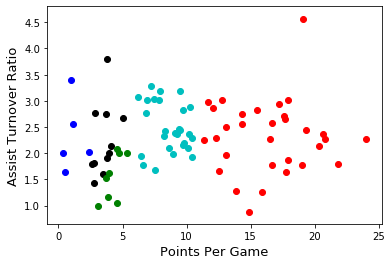

In [20]:
# Visualizing clusters
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['ppg'], clustered_df['atr'], c=colors[n-1])
        plt.xlabel('Points Per Game', fontsize=13)
        plt.ylabel('Assist Turnover Ratio', fontsize=13)
    plt.show()

visualize_clusters(point_guards, 5)

## Step 2

In [24]:
def recalculate_centroids(df):
    new_centroids_dict = dict()
    # 0..1...2...3...4
    for cluster_id in range(0, 5):
        # Finish the logic
        values_in_cluster = df[df['cluster'] == cluster_id]
        # Calculate new centroid using mean of values in the cluster
        new_centroid = [np.mean(values_in_cluster['ppg']), np.mean(values_in_cluster['atr'])]
        new_centroids_dict[cluster_id] = new_centroid
    return new_centroids_dict

centroids_dict = recalculate_centroids(point_guards)
centroids_dict

{0: [3.537835972560586, 2.2452153231242296],
 1: [1.0626344086021506, 2.326974488720219],
 2: [4.2244256711059025, 1.5546504047297278],
 3: [16.406803554549132, 2.329653169031597],
 4: [8.614448825166612, 2.489817106264363]}

In [23]:
centroids_dict.values()

dict_values([[3.537835972560586, 2.2452153231242296]])

## Repeat Step 1

c:\users\test\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


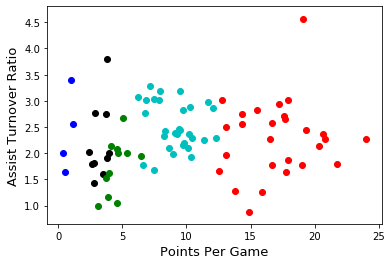

In [26]:
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

## Repeat Step 2 and Step 1

c:\users\test\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


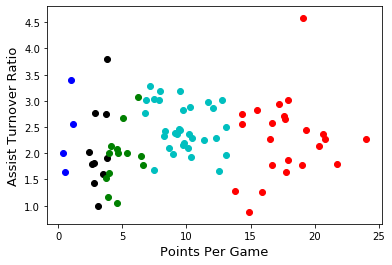

In [27]:
centroids_dict = recalculate_centroids(point_guards)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

## Challenges of K-Means

As you repeat Steps 1 and 2 and run `visualize_clusters`, you'll notice that a few of the points are changing clusters between every iteration (especially in areas where 2 clusters almost overlap), but otherwise, the clusters visually look like they don't move a lot after every iteration. This means 2 things:

* K-Means doesn't cause massive changes in the makeup of clusters between iterations, meaning that it will always converge and become stable
* Because K-Means is conservative between iterations, where we pick the initial centroids and how we assign the players to clusters initially matters a lot

To counteract these problems, the `sklearn` implementation of K-Means does some intelligent things like re-running the entire clustering process lots of times with random initial centroids so the final results are a little less biased on one passthrough's initial centroids.

c:\users\test\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


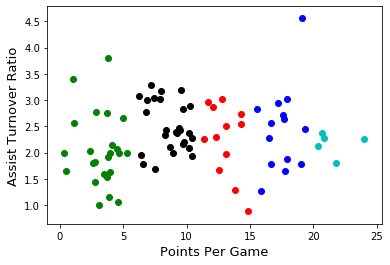

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(point_guards[['ppg', 'atr']])
point_guards['cluster'] = kmeans.labels_

visualize_clusters(point_guards, num_clusters)

## Conclusion

In this lesson, we explored how to segment NBA players into groups with similar traits. Our exploration helped us get a sense of the 5 types of point guards as based on each player's Assist Turnover Ratio and Points Per Game. In future lessons, we will explore how to cluster using many more features, as well as alternative ways of clustering data without using centroids.

We also got to experience the beauty of sklearn and the simplicity of using sophisticated models to get what we need accomplished quickly. In just a few lines, we ran and visualized the results of a robust K-means clustering implementation. When using K-means in the real world, use the sklearn implementation.